<a href="https://colab.research.google.com/github/mohammedawney84/Deep-Learning-with-PyTorch/blob/master/AlexUinverted_resnet18_fn_scr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# AlexU data Downloading

In [2]:
!gdown https://drive.google.com/uc?id=1MBfR-zW1tchWPd6qqwz1EcDLYtJw2lFt
!unzip -qq AlexDatase_words.zip   #-d ALEXU_dataset
!rm AlexDatase_words.zip

Downloading...
From: https://drive.google.com/uc?id=1MBfR-zW1tchWPd6qqwz1EcDLYtJw2lFt
To: /content/AlexDatase_words.zip
238MB [00:01, 188MB/s]


#IFN/ENIT dataset Download

In [3]:
!gdown https://drive.google.com/uc?id=1ZuVwfZ8eADAUTMR-R2UA08Bxe_DMHMU4
!unzip -qq IFN_ENIT_imageNet_v3.zip     #-d ALEXU_dataset
!rm IFN_ENIT_imageNet_v3.zip

Downloading...
From: https://drive.google.com/uc?id=1ZuVwfZ8eADAUTMR-R2UA08Bxe_DMHMU4
To: /content/IFN_ENIT_imageNet_v3.zip
47.1MB [00:00, 70.8MB/s]


# Early stop file downloading

In [2]:
!gdown https://drive.google.com/uc?id=1zUc6vI5T9o-O4r4pJ3Tk6Q7Gd48YEbye
import MyTL_utility
from MyTL_utility import *

Downloading...
From: https://drive.google.com/uc?id=1zUc6vI5T9o-O4r4pJ3Tk6Q7Gd48YEbye
To: /content/pytorchtools.py
100% 1.77k/1.77k [00:00<00:00, 1.58MB/s]


# AlexU data preparation and show some samples

In [0]:
AlexUdatasetInverted('/content/AlexDatasetFastai')

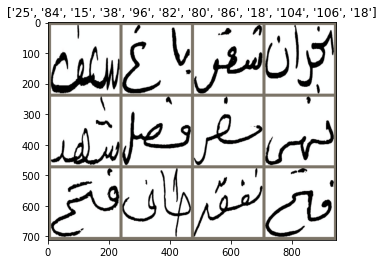

In [3]:
alex_loaders, alex_datasetSizes, alex_classes, device = dataProcess('AlexU_inverted', (224, 224))
alexTrain, alexValid, alexTest = alex_loaders['train'], alex_loaders['valid'], alex_loaders['test']
showSample(alexTrain, alex_classes, n_shownImage=12)

# IFN/ENIT data preparation and show some samples

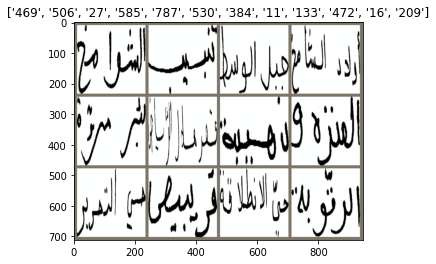

In [4]:
ifn_loaders, ifn_datasetSizes, ifn_classes, device = dataProcess('IFN', (224, 224))
ifnTrain, ifnValid, ifnTest = ifn_loaders['train'], ifn_loaders['valid'], ifn_loaders['test']
showSample(ifnTrain, ifn_classes, n_shownImage=12)

# Eleminate Randomness

In [0]:
% matplotlib inline
import torch
import numpy as np
torch.manual_seed(10)
torch.cuda.manual_seed(10)
np.random.seed(10)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Find_lr

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


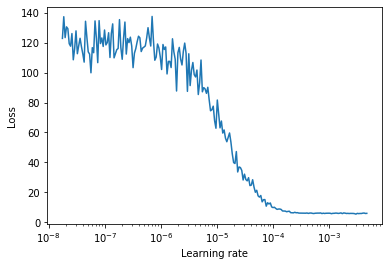

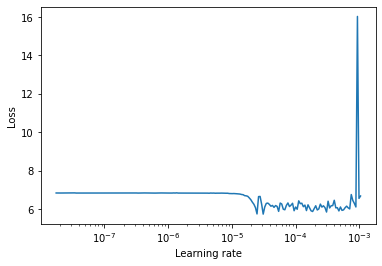

In [8]:
model_name= 'alexnet'
model_ft, _ = initialize_model(model_name, num_classes=len(ifn_classes), feature_extract=False, use_pretrained=True)
optimizer_ft = torch.optim.Adam(model_ft.parameters())
find_lr(model_ft, nn.CrossEntropyLoss(), optimizer_ft, ifn_loaders)
(lrs, losses) = find_lr(model_ft, nn.CrossEntropyLoss(), optimizer_ft,ifn_loaders, final_value=1,device=device)
plotFind_lr(lrs, losses)

model_sc, _ =  initialize_model(model_name, num_classes=len(ifn_classes), feature_extract=False, use_pretrained=False)
optimizer_sc = torch.optim.Adam(model_sc.parameters())
(lrs_sc, losses_sc) = find_lr(model_sc, nn.CrossEntropyLoss(), optimizer_sc, ifn_loaders, final_value=1)
plotFind_lr(lrs_sc, losses_sc)

#Create models to train AlexU on resnet twice; one from pretraining and one from scratch

In [0]:
model_name= 'resnet'

model_ft, _ = initialize_model(model_name, num_classes=len(alex_classes), feature_extract=False, use_pretrained=True)
optimizer_ft = torch.optim.Adam(model_ft.parameters(),lr=3e-4)

model_sc, _ = input_size = initialize_model(model_name, num_classes=len(alex_classes), feature_extract=False, use_pretrained=False)
optimizer_sc = torch.optim.Adam(model_sc.parameters(),lr=3e-4)

criterion = nn.CrossEntropyLoss()

# AlexU train and test

Epoch 1/15 
train Loss: 0.9849, Acc: 84.1344 % 
valid Loss: 0.1140, Acc: 98.9800 % 
Epoch 2/15 
train Loss: 0.0505, Acc: 99.5734 % 
valid Loss: 0.0523, Acc: 99.2600 % 
Epoch 3/15 
train Loss: 0.0124, Acc: 99.9267 % 
valid Loss: 0.0257, Acc: 99.6000 % 
Epoch 4/15 
train Loss: 0.0044, Acc: 100.0000 % 
valid Loss: 0.0208, Acc: 99.6400 % 
Epoch 5/15 
train Loss: 0.0023, Acc: 100.0000 % 
valid Loss: 0.0200, Acc: 99.6200 % 
Epoch 6/15 
train Loss: 0.0016, Acc: 100.0000 % 
valid Loss: 0.0178, Acc: 99.6400 % 
Epoch 7/15 
train Loss: 0.0011, Acc: 100.0000 % 
valid Loss: 0.0181, Acc: 99.6200 % 
Epoch 8/15 
train Loss: 0.0009, Acc: 100.0000 % 
valid Loss: 0.0168, Acc: 99.6600 % 
Epoch 9/15 
train Loss: 0.0007, Acc: 100.0000 % 
valid Loss: 0.0162, Acc: 99.6800 % 
Epoch 10/15 
train Loss: 0.0006, Acc: 100.0000 % 
valid Loss: 0.0157, Acc: 99.6200 % 
Epoch 11/15 
train Loss: 0.0005, Acc: 100.0000 % 
valid Loss: 0.0155, Acc: 99.6600 % 
Epoch 12/15 
train Loss: 0.0004, Acc: 100.0000 % 
valid Loss: 0.01

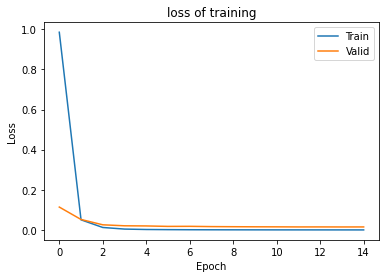

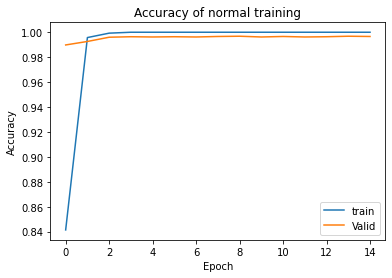


 Test set: Average loss: 0.0205, Accutacy: 5003/5029(99.48%)

Epoch 1/15 
train Loss: 2.0121, Acc: 59.3827 % 
valid Loss: 0.5033, Acc: 90.7000 % 
Epoch 2/15 
train Loss: 0.2715, Acc: 95.5803 % 
valid Loss: 0.6904, Acc: 80.3000 % 
Epoch 3/15 
train Loss: 0.1111, Acc: 98.0935 % 
valid Loss: 0.1331, Acc: 96.9400 % 
Epoch 4/15 
train Loss: 0.0570, Acc: 99.1601 % 
valid Loss: 0.1013, Acc: 97.7800 % 
Epoch 5/15 
train Loss: 0.0277, Acc: 99.7000 % 
valid Loss: 0.1035, Acc: 97.4400 % 
Epoch 6/15 
train Loss: 0.0229, Acc: 99.7200 % 
valid Loss: 0.0770, Acc: 97.9600 % 
Epoch 7/15 
train Loss: 0.0270, Acc: 99.6334 % 
valid Loss: 0.0627, Acc: 98.5600 % 
Epoch 8/15 
train Loss: 0.0233, Acc: 99.6734 % 
valid Loss: 0.3314, Acc: 90.0400 % 
Epoch 9/15 
train Loss: 0.0303, Acc: 99.4467 % 
valid Loss: 0.1004, Acc: 97.1200 % 
Epoch 10/15 
train Loss: 0.0311, Acc: 99.3800 % 
valid Loss: 0.1142, Acc: 97.0200 % 
Epoch 11/15 
train Loss: 0.0127, Acc: 99.8067 % 
valid Loss: 0.0272, Acc: 99.2400 % 
Epoch 12/15

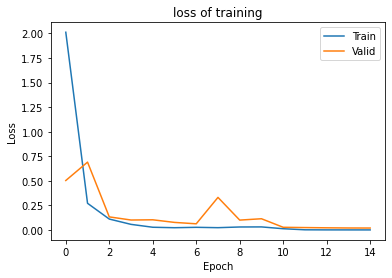

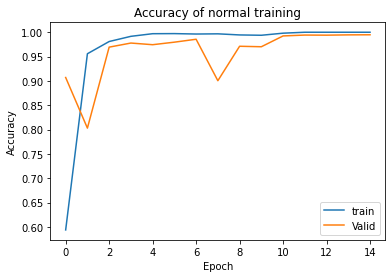


 Test set: Average loss: 0.0208, Accutacy: 4996/5029(99.34%)



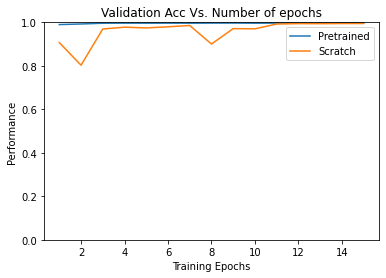

In [7]:
num_epochs = 15
models = [model_ft, model_sc]
optimizers = [optimizer_ft, optimizer_sc]
trained_models = []
Valid_acc = []
modelsTestAcc = []
models_names= ['AlexU_resnet18_FT','AlexU_resnet18_scr']
for i, (model, optimizer) in enumerate(zip(models, optimizers)):
    alex_tn, TL, VL, Tacc, Vacc = train(model, alex_loaders, criterion, optimizer, num_epochs, alex_datasetSizes, modelName=models_names[i], earlyStop=False ,device = device)
    trained_models.append(alex_tn)
    Valid_acc.append(Vacc)

    
    test_loss, test_acc = test(alex_tn, alex_loaders, criterion, alex_datasetSizes, device=device)
    modelsTestAcc.append(test_acc)

plt.title("Validation Acc Vs. Number of epochs")
plt.xlabel('Training Epochs')
plt.ylabel('Performance')
plt.plot(range(1, num_epochs + 1), Valid_acc[0], label="Pretrained")
plt.plot(range(1, num_epochs + 1), Valid_acc[1], label="Scratch" )
plt.ylim(0, 1)
#plt.xticks(range(1, num_epochs +1, 1))
plt.legend()
plt.show()

# Transfer Learning to IFN/ENIT

In [0]:
from torchvision import models
ifn_criterion = torch.nn.CrossEntropyLoss()

ifn_model_alexFt = models.resnet18(pretrained=False)
ifn_model_alexFt.fc = nn.Linear(in_features=512, out_features=len(alex_classes))
ifn_model_alexFt.load_state_dict(torch.load('/content/AlexU_resnet18_FT.pt'))
ifn_model_alexFt.fc = nn.Linear(in_features=512, out_features=len(ifn_classes))
ifn_alexFt_optimizer = optim.Adam(ifn_model_alexFt.parameters(), lr=3e-4)

In [0]:
ifn_model_alexScr = models.resnet18(pretrained=False)
ifn_model_alexScr.fc = nn.Linear(in_features=512, out_features=len(alex_classes))
ifn_model_alexScr.load_state_dict(torch.load('/content/AlexU_resnet18_scr.pt'))
ifn_model_alexScr.fc = nn.Linear(in_features=512, out_features=len(ifn_classes))
ifn_alexScr_optimizer = optim.Adam(ifn_model_alexScr.parameters(), lr=3e-4)

In [0]:
ifn_scr_model = models.resnet18(pretrained=False)
ifn_scr_model.fc = nn.Linear(in_features=512, out_features=len(ifn_classes))
ifn_scr_optimizer = optim.Adam(ifn_scr_model.parameters(), lr=3e-4)

In [0]:
ifn_Ft_model = models.resnet18(pretrained=True)
ifn_Ft_model.fc = nn.Linear(in_features=512, out_features=len(ifn_classes))
ifn_Ft_optimizer = optim.Adam(ifn_Ft_model.parameters(), lr=3e-4)

Epoch 1/35 
train Loss: 2.2702, Acc: 67.2194 % 
valid Loss: 1.0161, Acc: 83.8783 % 
Epoch 2/35 
train Loss: 0.4575, Acc: 92.7154 % 
valid Loss: 0.2760, Acc: 95.0860 % 
Epoch 3/35 
train Loss: 0.0736, Acc: 99.3528 % 
valid Loss: 0.1155, Acc: 98.2423 % 
Epoch 4/35 
train Loss: 0.0202, Acc: 99.8677 % 
valid Loss: 0.0611, Acc: 99.0550 % 
Epoch 5/35 
train Loss: 0.0073, Acc: 99.9764 % 
valid Loss: 0.0505, Acc: 99.1873 % 
Epoch 6/35 
train Loss: 0.0049, Acc: 99.9858 % 
valid Loss: 0.0440, Acc: 99.1495 % 
Epoch 7/35 
train Loss: 0.0026, Acc: 100.0000 % 
valid Loss: 0.0404, Acc: 99.2440 % 
Epoch 8/35 
train Loss: 0.0018, Acc: 100.0000 % 
valid Loss: 0.0381, Acc: 99.3007 % 
Epoch 9/35 
train Loss: 0.0014, Acc: 100.0000 % 
valid Loss: 0.0370, Acc: 99.1873 % 
Epoch 10/35 
train Loss: 0.0011, Acc: 100.0000 % 
valid Loss: 0.0357, Acc: 99.2440 % 
Epoch 11/35 
train Loss: 0.0009, Acc: 100.0000 % 
valid Loss: 0.0342, Acc: 99.2629 % 
Epoch 12/35 
train Loss: 0.0007, Acc: 100.0000 % 
valid Loss: 0.0332,

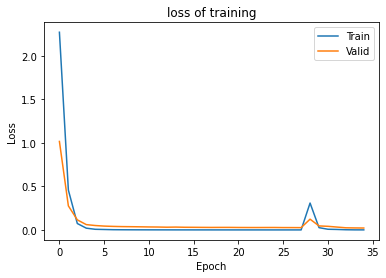

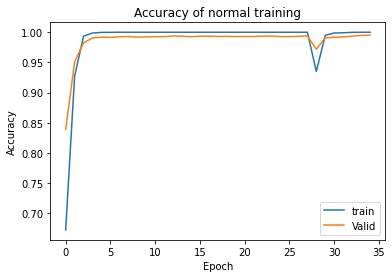


 Test set: Average loss: 0.2406, Accutacy: 5750/6033(95.31%)

Epoch 1/35 
train Loss: 2.6195, Acc: 61.6166 % 
valid Loss: 1.1892, Acc: 80.9110 % 
Epoch 2/35 
train Loss: 0.6497, Acc: 88.8275 % 
valid Loss: 0.4560, Acc: 91.5139 % 
Epoch 3/35 
train Loss: 0.1954, Acc: 97.3214 % 
valid Loss: 0.2281, Acc: 95.6152 % 
Epoch 4/35 
train Loss: 0.0734, Acc: 99.2205 % 
valid Loss: 0.1533, Acc: 97.0705 % 
Epoch 5/35 
train Loss: 0.0316, Acc: 99.7166 % 
valid Loss: 0.1087, Acc: 98.2990 % 
Epoch 6/35 
train Loss: 0.0266, Acc: 99.7307 % 
valid Loss: 0.1252, Acc: 97.4107 % 
Epoch 7/35 
train Loss: 0.0196, Acc: 99.8394 % 
valid Loss: 0.0977, Acc: 97.8076 % 
Epoch 8/35 
train Loss: 0.0207, Acc: 99.7780 % 
valid Loss: 0.1426, Acc: 96.9760 % 
Epoch 9/35 
train Loss: 0.0404, Acc: 99.4662 % 
valid Loss: 0.1268, Acc: 96.6736 % 
Epoch 10/35 
train Loss: 0.0282, Acc: 99.5937 % 
valid Loss: 0.0744, Acc: 98.2990 % 
Epoch 11/35 
train Loss: 0.0125, Acc: 99.8110 % 
valid Loss: 0.0789, Acc: 98.2612 % 
Epoch 12/35

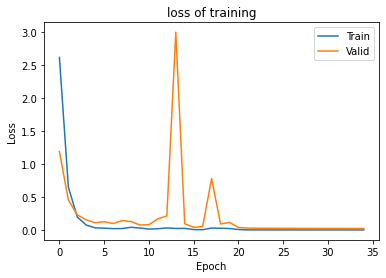

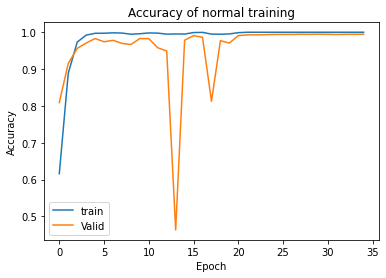


 Test set: Average loss: 0.2965, Accutacy: 5695/6033(94.40%)

Epoch 1/35 
train Loss: 3.9926, Acc: 35.2324 % 
valid Loss: 2.4199, Acc: 62.3512 % 
Epoch 2/35 
train Loss: 1.4766, Acc: 74.8441 % 
valid Loss: 1.3828, Acc: 73.6912 % 
Epoch 3/35 
train Loss: 0.5931, Acc: 88.9267 % 
valid Loss: 0.5729, Acc: 88.5655 % 
Epoch 4/35 
train Loss: 0.2385, Acc: 96.2632 % 
valid Loss: 0.3131, Acc: 93.8197 % 
Epoch 5/35 
train Loss: 0.1096, Acc: 98.6253 % 
valid Loss: 0.2192, Acc: 95.6341 % 
Epoch 6/35 
train Loss: 0.0534, Acc: 99.5040 % 
valid Loss: 0.1793, Acc: 96.3334 % 
Epoch 7/35 
train Loss: 0.0312, Acc: 99.7732 % 
valid Loss: 0.0979, Acc: 97.9777 % 
Epoch 8/35 
train Loss: 0.0283, Acc: 99.7118 % 
valid Loss: 0.2169, Acc: 94.9915 % 
Epoch 9/35 
train Loss: 0.0477, Acc: 99.4189 % 
valid Loss: 0.1477, Acc: 96.1822 % 
Epoch 10/35 
train Loss: 0.0405, Acc: 99.4095 % 
valid Loss: 0.2509, Acc: 93.6118 % 
Epoch 11/35 
train Loss: 0.0145, Acc: 99.8583 % 
valid Loss: 0.0647, Acc: 98.3557 % 
Epoch 12/35

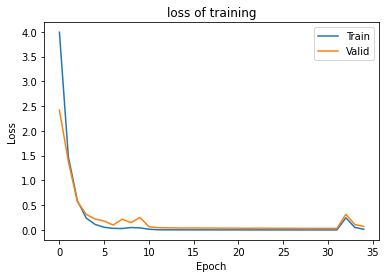

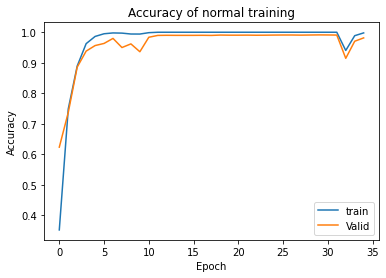


 Test set: Average loss: 0.3465, Accutacy: 5615/6033(93.07%)

Epoch 1/35 
train Loss: 2.8163, Acc: 58.9569 % 
valid Loss: 1.3438, Acc: 79.5691 % 
Epoch 2/35 
train Loss: 0.7338, Acc: 87.9488 % 
valid Loss: 0.4697, Acc: 91.0981 % 
Epoch 3/35 
train Loss: 0.1560, Acc: 98.1954 % 
valid Loss: 0.1717, Acc: 97.1272 % 
Epoch 4/35 
train Loss: 0.0339, Acc: 99.7591 % 
valid Loss: 0.0948, Acc: 98.6014 % 
Epoch 5/35 
train Loss: 0.0174, Acc: 99.8819 % 
valid Loss: 0.0736, Acc: 98.8093 % 
Epoch 6/35 
train Loss: 0.0056, Acc: 100.0000 % 
valid Loss: 0.0568, Acc: 98.9794 % 
Epoch 7/35 
train Loss: 0.0034, Acc: 100.0000 % 
valid Loss: 0.0539, Acc: 99.0172 % 
Epoch 8/35 
train Loss: 0.0025, Acc: 100.0000 % 
valid Loss: 0.0520, Acc: 99.0172 % 
Epoch 9/35 
train Loss: 0.0019, Acc: 100.0000 % 
valid Loss: 0.0491, Acc: 98.9983 % 
Epoch 10/35 
train Loss: 0.0015, Acc: 100.0000 % 
valid Loss: 0.0469, Acc: 99.0361 % 
Epoch 11/35 
train Loss: 0.0012, Acc: 100.0000 % 
valid Loss: 0.0454, Acc: 99.0172 % 
Epoch

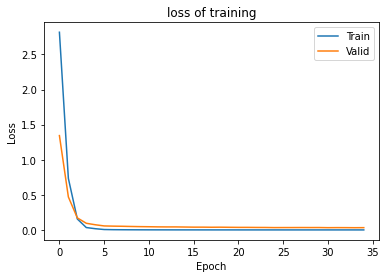

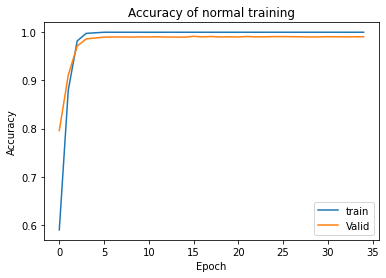


 Test set: Average loss: 0.3495, Accutacy: 5597/6033(92.77%)



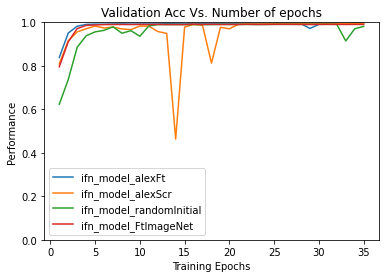

In [13]:
num_epochs = 35
models = [ifn_model_alexFt,ifn_model_alexScr, ifn_scr_model, ifn_Ft_model]
optimizers = [ifn_alexFt_optimizer, ifn_alexScr_optimizer, ifn_scr_optimizer, ifn_Ft_optimizer]
trained_models = []
Valid_acc = []
modelsTestAcc = []
models_names= ['ifn_model_alexFt','ifn_model_alexScr', 'ifn_model_randomInitial', 'ifn_model_FtImageNet']
for i, (model, optimizer) in enumerate(zip(models, optimizers)):
    tn, TL, VL, Tacc, Vacc = train(model, ifn_loaders, ifn_criterion, optimizer, num_epochs, ifn_datasetSizes, modelName=models_names[i], earlyStop=False ,device = device)
    trained_models.append(tn)
    Valid_acc.append(Vacc)

    
    test_loss, test_acc = test(tn, ifn_loaders, ifn_criterion, ifn_datasetSizes, device=device)
    modelsTestAcc.append(test_acc)

plt.title("Validation Acc Vs. Number of epochs")
plt.xlabel('Training Epochs')
plt.ylabel('Performance')
plt.plot(range(1, num_epochs + 1), Valid_acc[0], label="ifn_model_alexFt")
plt.plot(range(1, num_epochs + 1), Valid_acc[1], label="ifn_model_alexScr" )
plt.plot(range(1, num_epochs + 1), Valid_acc[2], label="ifn_model_randomInitial")
plt.plot(range(1, num_epochs + 1), Valid_acc[3], label="ifn_model_FtImageNet")
plt.ylim(0, 1)
#plt.xticks(range(1, num_epochs +1, 1))
plt.legend()
plt.show()